tensorboard --logdir lightning/ --host localhost --port 8088

In [1]:
from lightning_models.Regular_EN import Regular_En
from lightning_models.Regular_AE import Regular_AE
from lightning_models.Regular_EAE import Regular_EAE
from lightning_models.ResNet_EN import ResNet, BasicBlock
from lightning_models.ResNet_AE import ResNet_AE, Upconvblock 

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name      | Type       | Params
-----------------------------------------
0 | test_acc  | Accuracy   | 0     
1 | encoder   | Sequential | 3.2 M 
2 | classifer | Sequential | 6.6 K 
-----------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.645    Total estimated model params size (MB)
Finding best initial lr:  90%|█████████ | 90/100 [00:30<00:03,  2.94it/s]
LR finder stopped early due to diverging loss.
Restored states from the checkpoint file at c:\Users\WangS1\mbrdl\lr_find_temp_model.ckpt
0.0013182567385564075


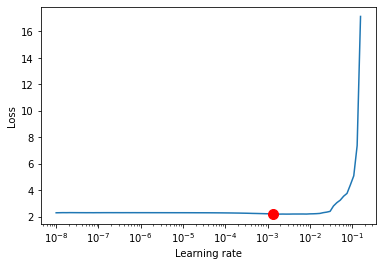

In [2]:
import pytorch_lightning as pl

latent_dims = 64
model_RG_EN = Regular_En(latent_dims)
model_RG_AE = Regular_AE(latent_dims)
model_RN_EN = ResNet(BasicBlock, [2, 2, 2, 2])
model_RN_AE = ResNet_AE(BasicBlock, Upconvblock, [2, 2, 2, 2])

trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_RG_EN)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name      | Type       | Params
-----------------------------------------
0 | test_acc  | Accuracy   | 0     
1 | encoder   | Sequential | 3.2 M 
2 | decoder   | Sequential | 4.8 M 
3 | classifer | Sequential | 6.6 K 
-----------------------------------------
7.9 M     Trainable params
0         Non-trainable params
7.9 M     Total params
31.656    Total estimated model params size (MB)
45000
Finding best initial lr:  92%|█████████▏| 92/100 [02:48<00:14,  1.83s/it]
LR finder stopped early due to diverging loss.
Restored states from the checkpoint file at c:\Users\WangS1\mbrdl\lr_find_temp_model.ckpt
0.0005248074602497723


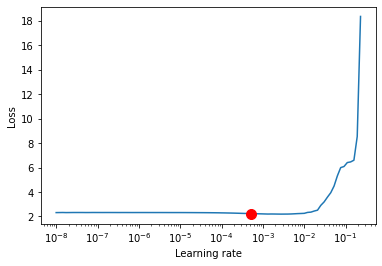

In [4]:
trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_RG_AE)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name     | Type        | Params
-----------------------------------------
0 | test_acc | Accuracy    | 0     
1 | conv1    | Conv2d      | 1.7 K 
2 | bn1      | BatchNorm2d | 128   
3 | layer1   | Sequential  | 147 K 
4 | layer2   | Sequential  | 525 K 
5 | layer3   | Sequential  | 2.1 M 
6 | layer4   | Sequential  | 8.4 M 
7 | linear   | Linear      | 5.1 K 
-----------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.696    Total estimated model params size (MB)
Finding best initial lr: 100%|██████████| 100/100 [04:41<00:00,  2.82s/it]
0.0005248074602497723


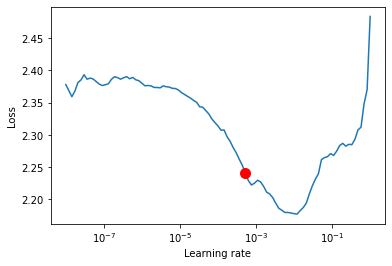

In [5]:
trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_RN_EN)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

   | Name      | Type        | Params
-------------------------------------------
0  | test_acc  | Accuracy    | 0     
1  | conv1     | Conv2d      | 1.7 K 
2  | bn1       | BatchNorm2d | 128   
3  | layer1    | Sequential  | 147 K 
4  | layer2    | Sequential  | 525 K 
5  | layer3    | Sequential  | 2.1 M 
6  | layer4    | Sequential  | 8.4 M 
7  | linear    | Linear      | 131 K 
8  | linear2   | Linear      | 2.1 M 
9  | layer6    | Sequential  | 3.5 M 
10 | layer7    | Sequential  | 870 K 
11 | layer8    | Sequential  | 217 K 
12 | conv2     | Sequential  | 1.7 K 
13 | classifer | Sequential  | 18.9 K
-------------------------------------------
18.0 M    Trainable params
0         Non-trainable params
18.0 M    Total params
71.965    Total estimated model params size (MB)
Finding best initial lr:  92%|█████████▏| 92/100 [08:06<00:42,  5.29s/it]
LR finder stopped early due to diverging loss.
Restored states f

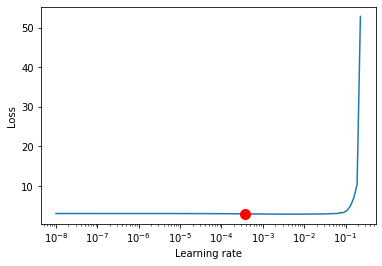

In [3]:
trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model_RN_AE)
lr_finder.results
fig = lr_finder.plot(suggest=True)
fig.show()
print(lr_finder.suggestion())